In [1]:
import torch
import matplotlib.pyplot as plt
from mf import MF

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

## Preparing the Test data

In [2]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd

# URL for MovieLens 100k dataset (you can change the URL for other versions)
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'

# Load the dataset directly into a pandas DataFrame
df = pd.read_csv(url, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

print(df.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [3]:
# take the unique value and mapping it
user_mapping = {user_id: idx for idx, user_id in enumerate(df['user_id'].unique())} 
item_mapping = {item_id: idx for idx, item_id in enumerate(df['item_id'].unique())}

# Applying the mappings
df['user_id'] = df['user_id'].map(user_mapping)
df['item_id'] = df['item_id'].map(item_mapping)

# print(df['user_id'].values)

# Convert from DataFrame into PyTorch tensor
user_tensor = torch.tensor(df['user_id'].values,dtype=torch.long)
item_tensor = torch.tensor(df['item_id'].values,dtype=torch.long)
rating_tensor = torch.tensor(df['rating'].values,dtype=torch.float)

# Create a dataset
dataset = TensorDataset(user_tensor, item_tensor, rating_tensor)

# Split the dataset into 70% training, 15% validation, and 15% test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

# Create a dataLoader for training, validation, and testing
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [4]:
model = MF(num_users=len(user_mapping)
           , num_items= len(item_mapping)
           , num_factors=50
           , device=device)

train_losses, val_losses = model._train(train_loader, val_loader,
                                         num_epochs=25,lr=0.002, reg=1e-5)


Epoch 1/25, Train Loss: 5.2211, Val Loss: 1.0819, Time: 3.96s
Epoch 2/25, Train Loss: 1.0236, Val Loss: 0.9918, Time: 4.02s
Epoch 3/25, Train Loss: 0.9184, Val Loss: 0.9739, Time: 3.96s
Epoch 4/25, Train Loss: 0.8508, Val Loss: 0.9614, Time: 3.83s
Epoch 5/25, Train Loss: 0.7852, Val Loss: 0.9537, Time: 4.00s
Epoch 6/25, Train Loss: 0.7139, Val Loss: 0.9524, Time: 3.99s
Epoch 7/25, Train Loss: 0.6358, Val Loss: 0.9594, Time: 4.03s
Epoch 8/25, Train Loss: 0.5519, Val Loss: 0.9674, Time: 3.86s
Epoch 9/25, Train Loss: 0.4646, Val Loss: 0.9800, Time: 4.10s
Epoch 10/25, Train Loss: 0.3891, Val Loss: 0.9976, Time: 3.97s
Epoch 11/25, Train Loss: 0.2841, Val Loss: 0.9822, Time: 4.13s
Epoch 12/25, Train Loss: 0.2631, Val Loss: 0.9820, Time: 4.06s
Epoch 13/25, Train Loss: 0.2544, Val Loss: 0.9834, Time: 4.29s
Epoch 14/25, Train Loss: 0.2472, Val Loss: 0.9857, Time: 4.36s
Epoch 15/25, Train Loss: 0.2406, Val Loss: 0.9880, Time: 3.94s
Epoch 16/25, Train Loss: 0.2342, Val Loss: 0.9901, Time: 4.20s
E

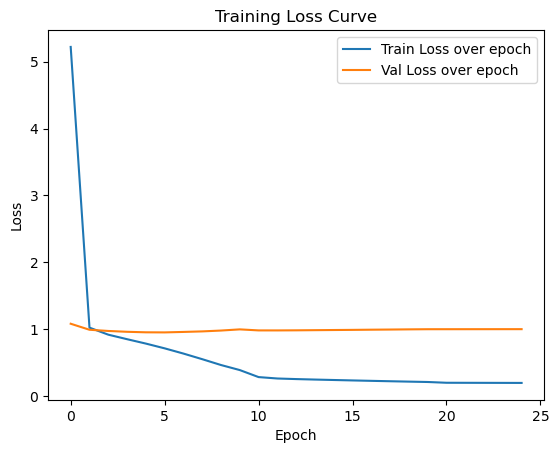

In [5]:
plt.plot( train_losses, label="Train Loss over epoch")
plt.plot( val_losses, label = "Val Loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()